# Spacy Sentence Transforer (Sentence BERT)


* [spaCy - sentence-transformers](https://spacy.io/universe/project/spacy-sentence-bert)

> This library lets you use the embeddings from sentence-transformers of Docs, Spans and Tokens directly from spaCy.
> ```
> pip install spacy-sentence-bert
> ```

* [Sentence-BERT for spaCy](https://github.com/MartinoMensio/spacy-sentence-bert) (Original Git repo)

> This package wraps sentence-transformers (also known as sentence-BERT) directly in spaCy. You can substitute the vectors provided in any spaCy model with vectors that have been tuned specifically for semantic similarity.

# Limitation

```spacy``` or ```spacy_sentence_bert``` only supports the models listed at [spacy-sentence-bert](https://github.com/MartinoMensio/spacy-sentence-bert). Not all the models listed at the [Sentence Bert](https://www.sbert.net/docs/pretrained_models.html) are not usable.

```
spacy.cli.download('distilbert-base-uncased-mnli')
---
✘ No compatible package found for 'distilbert-base-uncased-mnli' (spaCy v3.6.1)
```

```
nlp = spacy_sentence_bert.load_model('distilbert-base-uncased-mnli')
---
ValueError: Model "distilbert-base-uncased-mnli" not available
```

To use with ohter models.

* [spacy-sentence-bert](https://github.com/MartinoMensio/spacy-sentence-bert)

> If your model is not in this list (e.g., xlm-r-base-en-ko-nli-ststb), you can still use it with this library but not as a standalone language. You will need to add a pipeline stage properly configured (see below the nlp.add_pipe API). 

> If you want to use one of the sentence embeddings over an existing Language object, you can use the nlp.add_pipe method. This also works if you want to use a language model that is not listed in the table above.
> ```
> nlp.add_pipe('sentence_bert', config={'model_name': 'allenai-specter'})
> ```

In [10]:
import re
import spacy
import textacy
import networkx as nx

In [47]:
# DO NOT exclude/disable tok2vec for sentencing, NER to work
nlp = spacy.load("en_core_web_lg")

In [39]:
nlp.add_pipe('sentence_bert', config={'model_name': 'all-mpnet-base-v2'})

In [40]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'sentence_bert']

# Document

In [44]:
doc = nlp('Hi there, how are you?')
print(f"doc has vector {doc.has_vector} shape {doc.vector.shape} L2 norm: {doc.vector_norm}")

token = doc[0]
print(f"token has vector {token.has_vector} shape {token.vector.shape} L2 norm: {token.vector_norm}")

sentence = next(doc.sents)
print(f"Sentence has vector {sentence.has_vector} shape {sentence.vector.shape} L2 norm: {sentence.vector_norm}")


doc has vector True shape (768,) L2 norm: 0.9999999985722684
token has vector True shape (768,) L2 norm: 1.0
Sentence has vector True shape (768,) L2 norm: 1.0


In [45]:
doc_1 = nlp('Hi there, how are you?')
doc_2 = nlp('Hello there, how are you doing today?')
print(doc_1.similarity(doc_2))

0.8742572712128506


In [46]:
doc_1 = nlp('Hi there, how are you?')
doc_2 = nlp('Sushi is popular in the world now?')
print(doc_1.similarity(doc_2))

0.11733982367730836


# Example

In [17]:
# title = encoder("总理阿尔巴尼斯（Anthony Albanese）确认，在美国总统拜登（Joe Biden）取消对澳访问后，下周在悉尼举行的四方领导人会议将不会举行（点击收听详情）。")
title = nlp("Palestinian family left homeless after strikes")

In [18]:
text = re.sub('[\s"\[\]-]+', ' ', """
Kamal Nabhan was screaming as he thrust the phone into his cousin's hands, unable to believe what the anonymous caller was telling him.

The men had just got ready to go to afternoon prayers in Jabalia refugee camp. But the routine patterns of life were about to give way to violent destruction, wrought from above with a warning call.

Kamal's cousin Ataf reached out to his relative.

"I took the phone from him and talked to the person on the line," says Ataf. "He said he was from Israeli intelligence, and you have five minutes to evacuate the house."

They began to rush back, telling the Israeli caller he must be mistaken because the building "was full" of disabled people. "[The intelligence officer] said: 'No, immediately evacuate the house,'" says Ataf.

It was day five of the fiercest Israeli air strikes on Gaza in nine months. The campaign of so-called targeted assassinations killed at least six leading figures in Islamic Jihad, the Palestinian territory's second most powerful militant organisation.

But the attacks also killed 10 civilians on the first night alone - including wives and children of some of the men targeted as they slept. The group retaliated with waves of rocket attacks on Israeli cities, forcing thousands to take cover in bomb shelters.

Israel said it was acting after repeated rounds of rocket fire by Islamic Jihad, which in turn said it had fired because of police raids against Palestinians at al-Aqsa mosque in occupied east Jerusalem, and the recent death in Israeli jail of hunger striker Khader Adnan.

Last week's fighting killed 33 Palestinians in Gaza and two people in Israel - an Israeli and a Palestinian. It left more than 1,200 Palestinians displaced, according to the UN.

At the Nabhan family's building, Israel delivered on its warning. A single missile blew the block apart.

Just before a ceasefire deal was agreed late on Saturday, Israel destroyed several other residential blocks in similar circumstances - giving warnings to evacuate residents before bombing the buildings. These strikes that bring down whole apartment blocks are a well-worn tactic in its attacks on Gaza.

Israel says the buildings it hit were used as "command and control centres" by Islamic Jihad to direct rocket launches. It said its warning calls were meant to prevent harm to uninvolved civilians.

Local sources believe a militant lived in the building but not that it was an operational centre. Human rights groups condemn such attacks destroying entire residential blocks as a violation of international law. Another resident who received a warning call was filmed pleading with Israeli forces to limit any attack "to the apartment of the guilty".

The building in Jabalia has collapsed into its own foundations. An entire staircase that provided the escape route for several families lies horizontally, jutting into a smashed wall section. The remains of the roof are a few metres above the earth, providing the only shade for the former residents. Neighbours managed to get everyone out - nearly 50 people from eight families.

There were five people in the building with disabilities including muscular dystrophy, say support groups. Some had wheelchairs, specially modified beds and medicines destroyed in the air strike, they add.

Jamal al-Rozzi, executive director of the Gaza-based Society for Rehabilitation, who came to help the families, says his group will provide aid including food and medical devices.

"I feel angry and I feel pain because this should not happen, at least not for the civilians, especially not disabled people," he says.

Also sheltering among the rubble is another of Kamal Nabhan's relatives. Rahma Nabhan and her husband Yasser are sitting under a fractured roof slab, passing their baby daughter Jori to each other to soothe her cries.

"My sisters-in-law are disabled - they were not able even to cover their heads [when they were rescued], their wheelchairs were buried under the house," says Rahma.

"Everyone saw the disabled people fleeing. They were asking: 'Why did the house have to be destroyed? Have these disabled people fired rockets?' We have nothing to do with what's going on," she says.

Rahma walks me around the remnants, still clutching Jori as we navigate the rubble.

Her flat was on the top floor. Now there are only cardboard signs the residents have hoisted over the concrete remains, showing the names of each former inhabitant.

"We are not going anywhere, we will stay in the sun, sleep in the sun, we are not leaving the house," says Rahma.

"We call on the international organisations and [Palestinian President Mahmoud Abbas] to stand with us and rebuild this house because we have no place to go," she says.

The ceasefire reached on Saturday night, mediated by Egypt, has largely held. But tensions remain extremely high, after months of spiralling violence in the occupied West Bank which has spilt over into Gaza on three major occasions since an all-out war between Israel and Hamas in May 2021.

Last week's attacks have left Israeli Prime Minister Benjamin Netanyahu politically emboldened. They could easily have ignited a far bigger confrontation - in fact they still could despite the truce. But he has used the fighting to burnish his reputation for security in the face of unprecedented domestic unrest and growing pressure from religious-ultranationalist extremists in his coalition.

Despite its losses, Islamic Jihad has used the escalation to promote its appeal as the current face of armed resistance against Israel while Hamas - the dominant militant group in Gaza - stayed on the sidelines in terms of military action.

It publicly backed the rocket fire as part of a "unified" position by Palestinian factions but effectively restrained itself, thereby limiting the round of fighting. It also has to keep services running for Gaza's population under a crippling Israeli blockade. A larger war could swing popular opinion further against it.
""")
text

" Kamal Nabhan was screaming as he thrust the phone into his cousin's hands, unable to believe what the anonymous caller was telling him. The men had just got ready to go to afternoon prayers in Jabalia refugee camp. But the routine patterns of life were about to give way to violent destruction, wrought from above with a warning call. Kamal's cousin Ataf reached out to his relative. I took the phone from him and talked to the person on the line, says Ataf. He said he was from Israeli intelligence, and you have five minutes to evacuate the house. They began to rush back, telling the Israeli caller he must be mistaken because the building was full of disabled people. The intelligence officer said: 'No, immediately evacuate the house,' says Ataf. It was day five of the fiercest Israeli air strikes on Gaza in nine months. The campaign of so called targeted assassinations killed at least six leading figures in Islamic Jihad, the Palestinian territory's second most powerful militant organisa

In [19]:
sentence_scores = {
    sentence: title.similarity(nlp(sentence))
    for sentence in text.split('.')
}
sentence_scores

{" Kamal Nabhan was screaming as he thrust the phone into his cousin's hands, unable to believe what the anonymous caller was telling him": 0.09602694864373053,
 ' The men had just got ready to go to afternoon prayers in Jabalia refugee camp': 0.2162706598272315,
 ' But the routine patterns of life were about to give way to violent destruction, wrought from above with a warning call': 0.15365054110593035,
 " Kamal's cousin Ataf reached out to his relative": 0.14493887951243425,
 ' I took the phone from him and talked to the person on the line, says Ataf': 0.00038757917884733287,
 ' He said he was from Israeli intelligence, and you have five minutes to evacuate the house': 0.18501504245243947,
 ' They began to rush back, telling the Israeli caller he must be mistaken because the building was full of disabled people': 0.24444986223022622,
 " The intelligence officer said: 'No, immediately evacuate the house,' says Ataf": 0.08577362733897749,
 ' It was day five of the fiercest Israeli air

In [20]:
scores = dict(sorted(
    sentence_scores.items(), 
    key=lambda item: item[1],
    reverse=True
))
scores

{' It left more than 1,200 Palestinians displaced, according to the UN': 0.5514313972516417,
 ' These strikes that bring down whole apartment blocks are a well worn tactic in its attacks on Gaza': 0.4795561855186007,
 ' We call on the international organisations and Palestinian President Mahmoud Abbas to stand with us and rebuild this house because we have no place to go, she says': 0.47868514508545185,
 ' The group retaliated with waves of rocket attacks on Israeli cities, forcing thousands to take cover in bomb shelters': 0.447123736804137,
 ' Just before a ceasefire deal was agreed late on Saturday, Israel destroyed several other residential blocks in similar circumstances giving warnings to evacuate residents before bombing the buildings': 0.4323233103317427,
 ' Israel said it was acting after repeated rounds of rocket fire by Islamic Jihad, which in turn said it had fired because of police raids against Palestinians at al Aqsa mosque in occupied east Jerusalem, and the recent deat

In [21]:
sentences = list(scores.keys())
sentences

[' It left more than 1,200 Palestinians displaced, according to the UN',
 ' These strikes that bring down whole apartment blocks are a well worn tactic in its attacks on Gaza',
 ' We call on the international organisations and Palestinian President Mahmoud Abbas to stand with us and rebuild this house because we have no place to go, she says',
 ' The group retaliated with waves of rocket attacks on Israeli cities, forcing thousands to take cover in bomb shelters',
 ' Just before a ceasefire deal was agreed late on Saturday, Israel destroyed several other residential blocks in similar circumstances giving warnings to evacuate residents before bombing the buildings',
 ' Israel said it was acting after repeated rounds of rocket fire by Islamic Jihad, which in turn said it had fired because of police raids against Palestinians at al Aqsa mosque in occupied east Jerusalem, and the recent death in Israeli jail of hunger striker Khader Adnan',
 " Last week's fighting killed 33 Palestinians in

# High similiarity sentences

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
threshold = 0.3035
G = graph = textacy.representations.network.build_similarity_network(sentences[:20], "levenshtein")
edges = list(filter(lambda e: e[2] < threshold, (e for e in G.edges.data('weight'))))
edge_ids = list(e[:2] for e in edges)

# remove filtered edges from graph G
G.remove_edges_from(edge_ids)
G.remove_nodes_from(list(nx.isolates(G)))

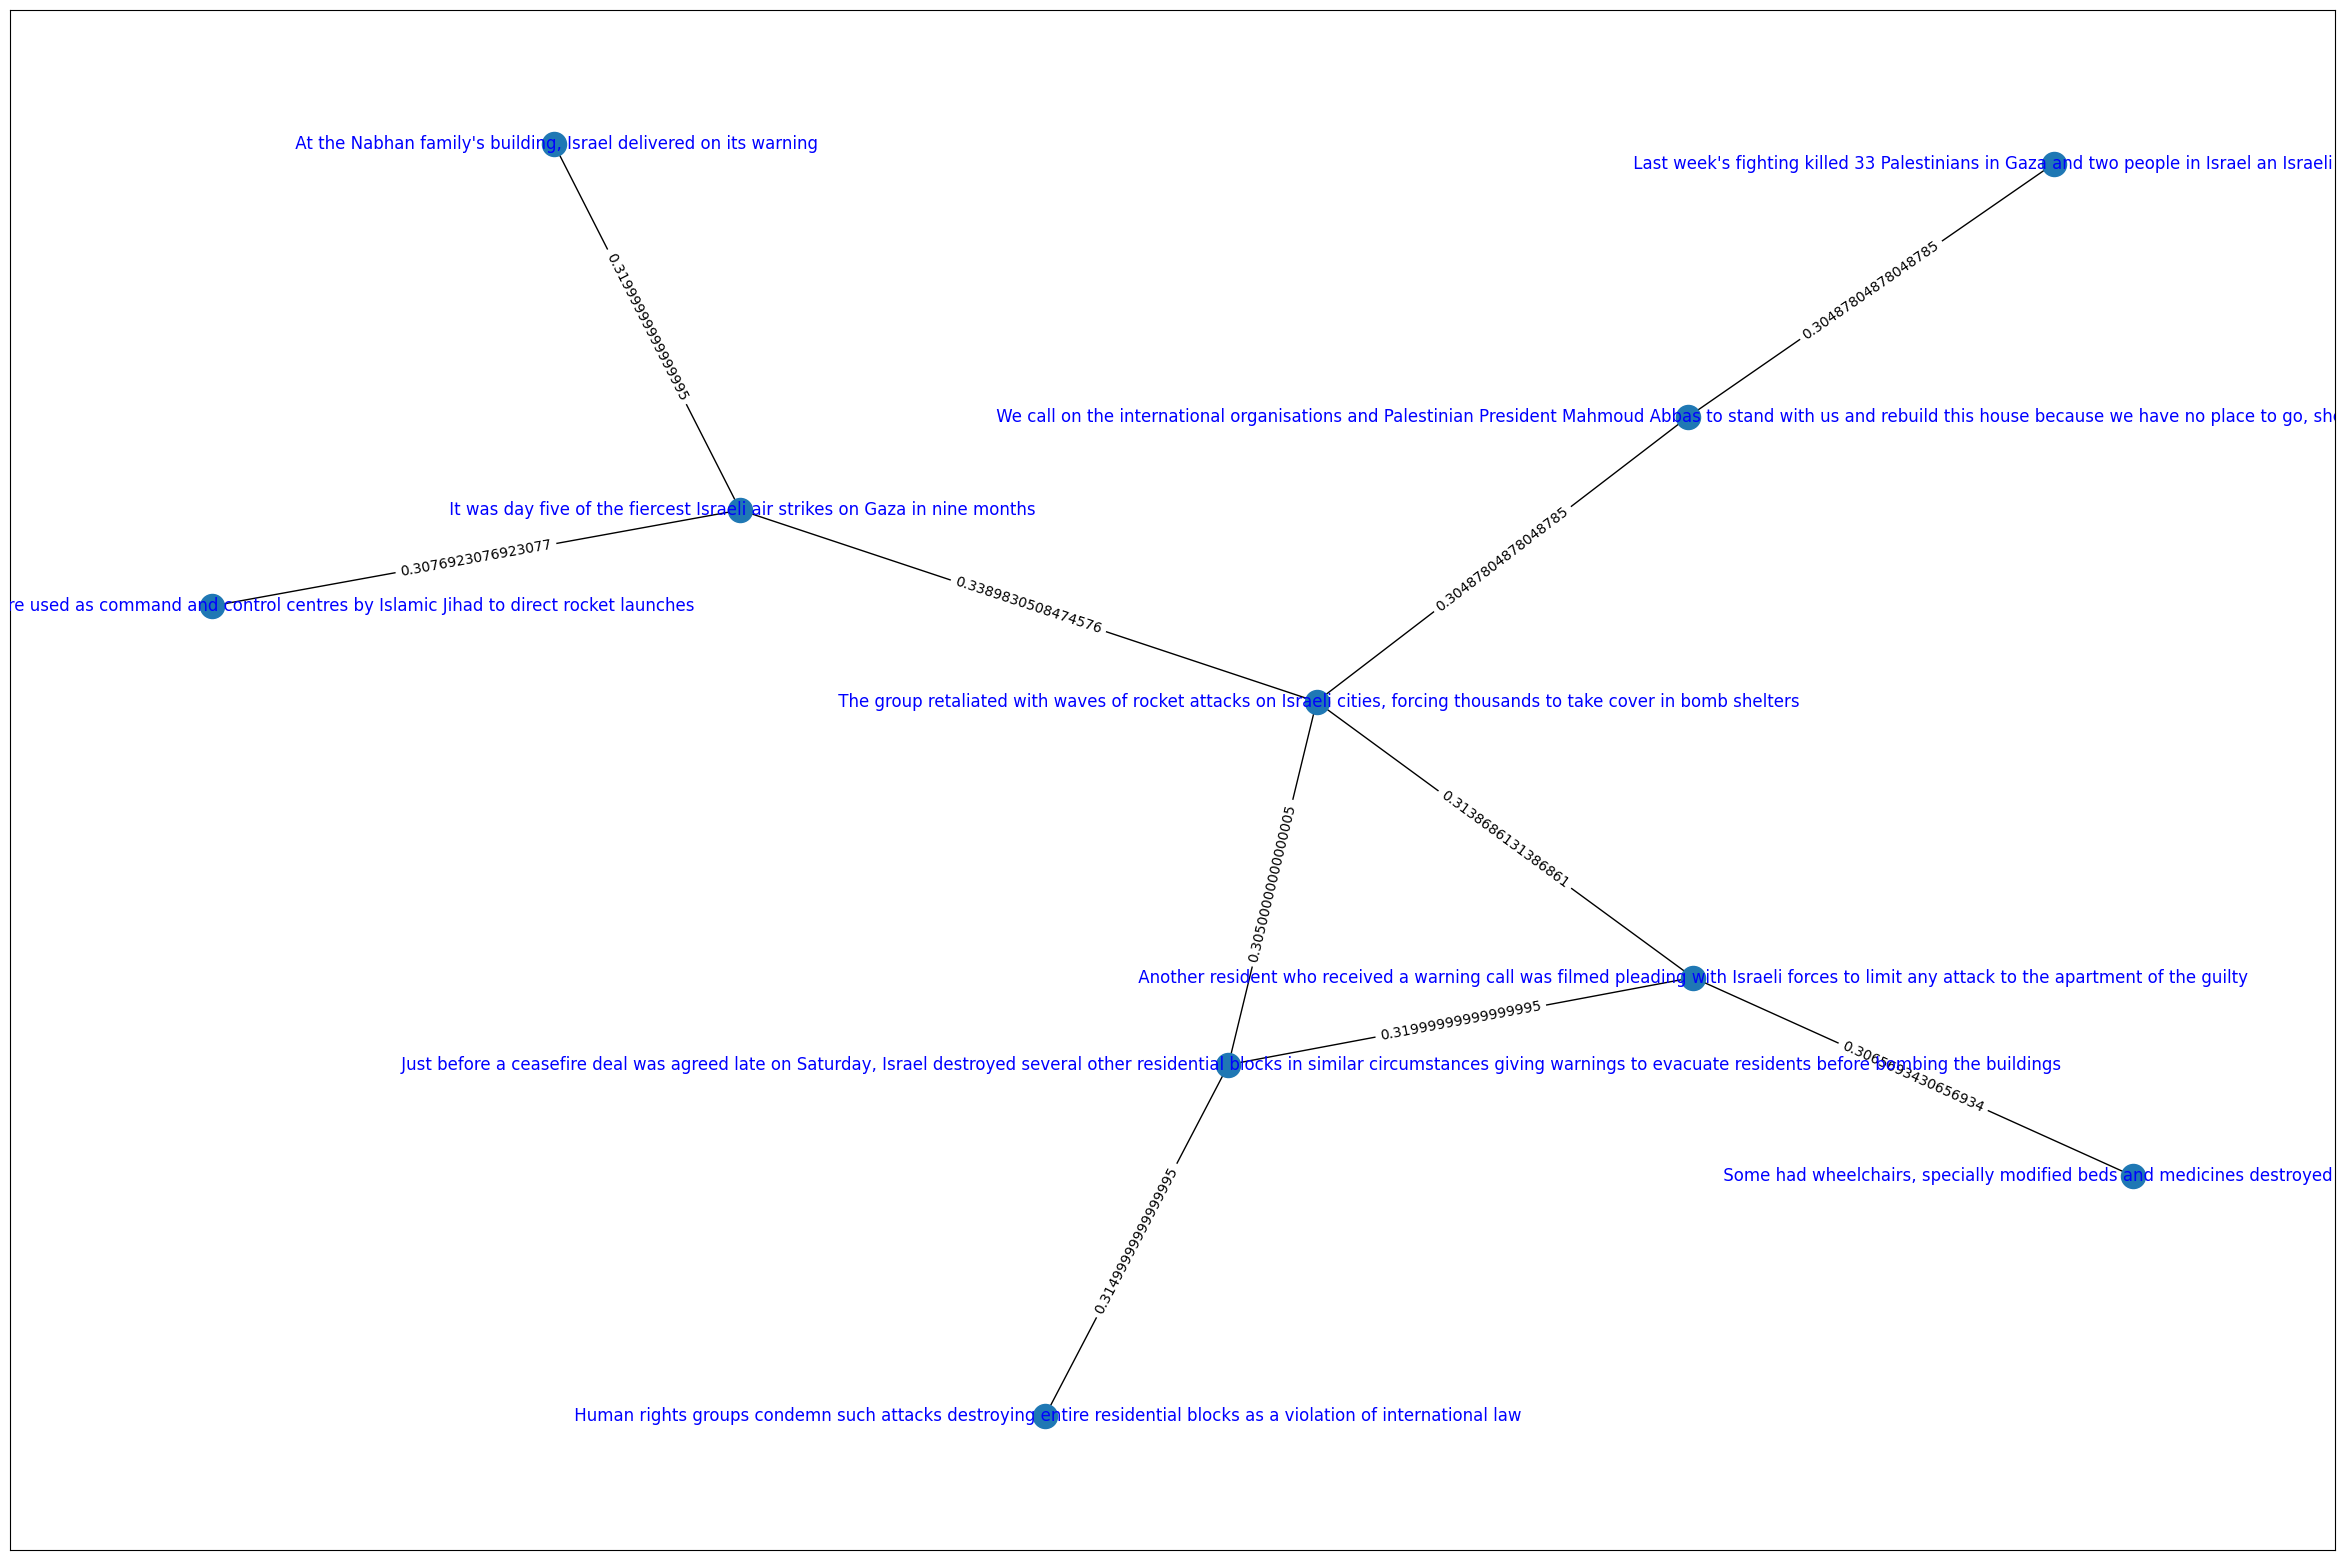

In [24]:
#nx.draw(graph)
plt.figure(figsize=(30,20))

# pos = nx.spring_layout(graph) 
# pos = nx.planar_layout(graph)
# pos = nx.circular_layout(G)
# pos = nx.shell_layout(G)
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(graph, pos, font_color='blue')
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph, pos,edge_labels=labels)

#nx.draw(graph, node_color='r', with_labels=True, font_color='blue')
plt.savefig("Graph.png", format="PNG")
plt.show()